# 機械学習入門3：教師あり学習（分類）- 決定木(DecisionTreeClassifier)

In [ ]:
# 分類 - カテゴリが異なる複数のデータを見分けることができる境界線を求める
# 線形分離可能 - 二次元平面上のあるデータを(集合)を一本の直線で分けられること
# 線形分離器 - 線形分離可能なアルゴリズム(例 - 単純パーセプトロン,線形サポートベクトルマシーン,ロジスティック回帰)
# 非線形分離器 - 線形分離可能でないアルゴリズム(例 - k-近傍方,決定技(分類木)m,ランダムフォレスト,非線形サポートベクトルマシーン,ニューラルネットワーク)

#決定木の実装

In [1]:
# 必要なmoduleのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [45]:
# datasetの読み込み
dataset = load_iris()
columns_name = dataset.feature_names #特徴量名

In [ ]:
x = dataset.data #入力データ
print(x)

In [ ]:
# ３つの種類の花(0,1,2)を分けるのが今回の問題設定
t = dataset.target #目標値
print(t)

# 種類を確認したい場合
print(np.unique(t))

print(x.shape)
print(t.shape)

In [13]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, t_train, t_test = train_test_split(x,t,test_size=0.3,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [29]:
# 決定木 - DecisionTreeClassifier(分類), DecisionTreeRegressor(回帰)
from sklearn.tree import DecisionTreeClassifier

In [32]:
#モデルの宣言 - インスタンス化(ここら辺は今はあまり考えなくてもいい)
model = DecisionTreeClassifier(random_state=0)
model

DecisionTreeClassifier(random_state=0)

In [33]:
# モデルの学習
model.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [34]:
#学習精度の検証
print(f"train_score:{model.score(x_train,t_train)}")
print(f"test_score:{model.score(x_test,t_test)}") 

# 結果の数字は決定係数ではなく,正解率(accurary)
# train_score:1.0 #正解率
# test_score:0.9777777777777777 

#分類には交差エントロピーが用いられる(評価指標)

train_score:1.0
test_score:0.9777777777777777


In [35]:
#類論
model.predict(x_test)

# 分類の場合はカテゴリを示すカテゴリが表せられる

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

#決定木の特徴

In [ ]:
# 決定木の特徴 - 条件分岐をりくり返すことによって分類を行う

# 強み
# 1,解釈が容易 - どのような流れで判断させたのかがわかりやすい
# 2,必要な前処理が少ない - 前処理の大体が距離をいう概念を元にアルゴリズムの中身が作られているが,決定木は異なるため、前処理の必要性が比較的少なめ

# 弱み(アルゴリズムの特性上仕方がない)
# 1,過学習になる場合が多い
# 2,汎用性の低いモデルになる傾向がある

# そのためハイパーパラメータが非常に重要になる
# max_depth(木構造の深さの上限) - 過学習を抑えるためのハイパーパラメータ。上限が低いとモデルの表現力が低下し、過学習を抑える
# min_samples_split(木構造の分岐先の値) - 分岐先のサンプル数の最低値を設定するハイパーパラメータ。過学習に陥る可能性が上がるため調整が必要

#木構造と特徴量の重要度

In [37]:
#木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz

In [38]:
# export_graphviz(model) - 先ほどのモデルをgraphviz(model)に書き出す
dot_data = export_graphviz(model)

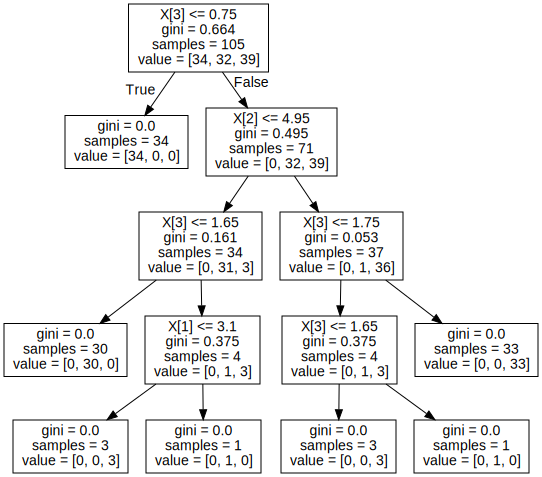

In [41]:
graph_tree = graphviz.Source(dot_data)
graph_tree

In [43]:
# どの入力変数の影響が大きいのか決定木ではわかる(木構造だから - 分岐の上に行けば行くほどモデル全体に対する影響が高くなる、最初に区切るのは最初の部分が大事だから）

# ↓この性質を生かして決定木は影響度が高いものを導くことができる
feature_importance = model.feature_importances_ #特徴量の重要度
print(feature_importance)

[0.         0.02150464 0.39766951 0.58082584]


In [47]:
# feature_importanceを可視化する
y = columns_name
width = feature_importance

<BarContainer object of 4 artists>

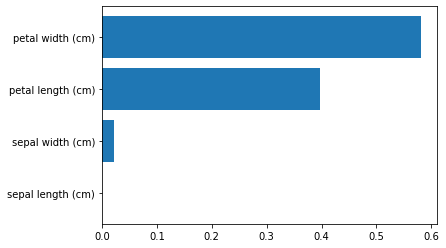

In [48]:
plt.barh(y=y,width=width)

#petal widthが重要(全体の58%を占める重要度)
# sepal legnthは全く重要ではない

# 木構造を見ればわかる,一番上がX[3]番目(petal width)が来てるため
# X[3]やX[2]が木構造でよく出てきて、X[0]はどこにも出てきていない
# 重要ではないから木構造の分岐点では一個も出てきていない

# Businessの現場ではどの変数が結果に影響しているのか求められることが多くある
# そのため決定木は解釈が容易なためよく用いられる

# 決定木はモデルの基礎概念になる - 複雑な問題設定に対して決定木単体で高い性能を出すことは少ない
# ただ決定をベースにしたモデルが最近は多い(アンサンブル学習 - モデルを複数用意して、その複数のモデルの結果を踏まえて一つのモデルにする) - ランダムフォレスト,XGBoost,LightGBM)

